# Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

## Understanding the Data

In [59]:
import pandas as pd

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

pd.options.display.max_columns = 150 # so we can see all columns
print('Shape:', data.shape)
data.head(5)

Shape: (18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

We're going to use this data set from freeCodeCamp, instead of organizing our own survey because the data is ready for our analysis and organizing our own survey would be a lot of work before we could even get to analysis.

The freeCodeCamp data set is from the freeCodeCamp website's "2017 New Coder Survey" of over 20,000 developers. The survey asks questions about what resources developers are using to learn as well as typical demographic questions. The data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

## Checking for Sample Representativity

Most of the courses we offer are on web and mobile development, but also cover other domains. Before starting analysis, we need to make sure our data is representative of the population of new coders that are interested in the subjects we teach.

In [60]:
(data['JobRoleInterest'].value_counts(normalize=1)*100)

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

It looks like people can answer that they are interested in more than one subject and also a lot of people included some form of web development in their interests. Lets take a look to see how many people included web or mobile development in their interests.

In [61]:
not_null_interests = data['JobRoleInterest'].dropna()
print(len(not_null_interests), "of 18175 survey respondants specified the job roles they were interested in.")
web_or_mobile = not_null_interests.str.lower().str.contains("web|mobile") # list of booleans
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

6992 of 18175 survey respondants specified the job roles they were interested in.
True     86.312929
False    13.687071
Name: JobRoleInterest, dtype: float64


Of the 6992 survey participants that answered the job interest question, 86% are interested in web or mobile development. There are about 11,000 participants that didn't answer the question, so to be sure we are working with a sample that is representative of coders that could benefit from our platform, we'll need to limit the data to just the participants that answered the question.

## New Coders - Locations and Densities

Let's take a look at where the survey respondants who answered the job interest question are located to identify possible markets to run advertising for our service. We will consider each country a separate market and look to identify the two best countries to advertise in by identifying which countries have the most potential customers.

In [62]:
data = data[data['JobRoleInterest'].notna()]
data['CountryLive'].value_counts().head(5)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Name: CountryLive, dtype: int64

By far the most respondants currently live in the US with India in second place. Based on this information these would be the two best markets to advertise in. We could go more in depth using other survey information about money spent by new coders.

## Spending Money for Learning

In the freeCodeCamp survey, questions were asked about how much money new coders spend on learning. Our service is not free, so we are interested in finding a market of users who are willing to spend money to learn coding.

We'll narrow our analysis to four markets: the US, India, the United Kingdom, and Canada. These countries had the number of survey respondants and in each of the English is an official language, which is also the language our platform is in.

Let's take a look at information about money spent per month by new coders from the survey.

In [63]:
data['dollars_per_month'] = data['MoneyForLearning'] / data['MonthsProgramming'].replace(0,1) # to avoid diving by zero
data['dollars_per_month'].isnull().value_counts()
data = data[(data['dollars_per_month'].notna()) & (data['CountryLive'].notna())]
target_countries = ['United States of America','India','United Kingdom','Canada']
target_data = data[data['CountryLive'].isin(target_countries)]
target_data.groupby('CountryLive').mean()['dollars_per_month']

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: dollars_per_month, dtype: float64

Survey respondants in the US spend the most per month on learning, followed by India and Canada. Respondants in the UK don't spend very much. Based on these results I would keep my recommendation of targeting the US and India as the two best markets advertisement.

## Dealing with Extreme Outliers

The results of the last step seem weird. Based on socio-economic data we would expect new coders in the UK and Canada to be able to spend more on learning than user in India. Lets check for outliers that might be affecting our results.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


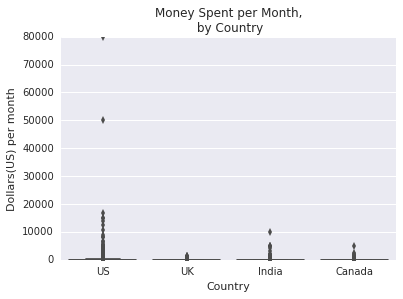

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(x='CountryLive',y='dollars_per_month',data=target_data)
plt.title("Money Spent per Month,\n by Country")
plt.ylabel('Dollars(US) per month')
plt.xlabel('Country')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

It is hard to see if anything is up with the UK or Canada because the US has some extreme outliers. Two people are spending over $50,000 per month on learning. Lets remove these outliers and reproduce the plots.

In [65]:
target_data = target_data[target_data['dollars_per_month'] < 10000]

# Recompute means
target_data.groupby('CountryLive').mean()['dollars_per_month']

CountryLive
Canada                      113.510961
India                       113.748387
United Kingdom               45.534443
United States of America    155.459187
Name: dollars_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


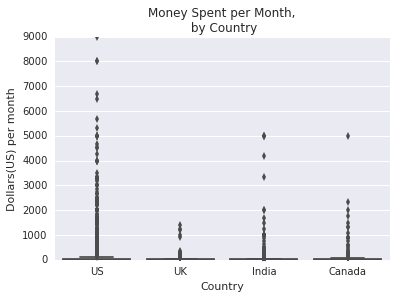

In [66]:
# Reproduce box-plots
sns.boxplot(x='CountryLive',y='dollars_per_month',data=target_data)
plt.title("Money Spent per Month,\n by Country")
plt.ylabel('Dollars(US) per month')
plt.xlabel('Country')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

There are still a large number of outliers. Let's take a closer look.

In [67]:
target_data[target_data['dollars_per_month'] > 6000]

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,dollars_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Two trends in the above data are survey participants who attended a bootcamp and those who haven't been coding long. Bootcamps are generally large one-time expenses and learners expect to pay more for this type of learning than a typically online platform, so we could exclude these people. 

Learners who haven't been coding long may have spent a large amount of money upfront and will not be spending money for a while, making their average spending after a longer period of time much lower. We'll just remove outliers who haven't been programming long, to get a balance of looking at longer term averages as well as including info on the spending of very new coders.

In [68]:
# remove people who attended bootcamp
attended_bootcamp = target_data[target_data['AttendedBootcamp'] == 1]
target_data = target_data.drop(attended_bootcamp.index)

# remove people that have been coding less than 3 months
less_than_3_months = target_data[
    (target_data['MonthsProgramming'] < 3) &
    (target_data['dollars_per_month'] > 3000)
]
target_data = target_data.drop(less_than_3_months.index)

# Recalculate mean
target_data.groupby('CountryLive').mean()['dollars_per_month']

CountryLive
Canada                      63.958456
India                       89.514114
United Kingdom              34.468329
United States of America    66.848614
Name: dollars_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


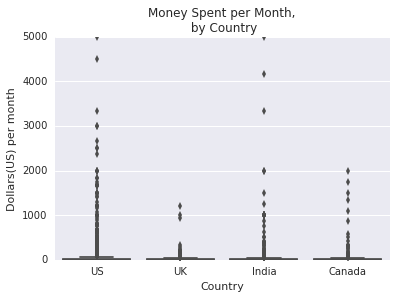

In [69]:
# Reproduce box-plots
sns.boxplot(x='CountryLive',y='dollars_per_month',data=target_data)
plt.title("Money Spent per Month,\n by Country")
plt.ylabel('Dollars(US) per month')
plt.xlabel('Country')
plt.xticks(range(4),['US','UK','India','Canada'])
plt.show()

It looks like dealing with some of our outliers brings the US average way down so that India now has the highest average money spent per month.

## Choosing the Two Best Markets

After dealing with outliers we have India as a clear choice as a market to advertise in. The US and Canada are very close to each other in second. Lets take a look at the number of learners in these countries.

In [71]:
target_data['CountryLive'].value_counts()

United States of America    2682
India                        453
United Kingdom               272
Canada                       231
Name: CountryLive, dtype: int64

With the US having almost ten times as many survey respondants as Canada, its clear that the US should be our second choice of market to advertise in as there is a larger potential pool of customers to be reached with the advertising.

## Conclusion

The two top markets to advertised in, based on survey data from FreeCodeCamp are India and the United States. We reached this conclusion through analysis of location and spending data from the FreeCodeCamp survey as well as some data cleaning to remove outliers.

This information would be great to send to a marketing team with more domain specific knowledge to help make targeted marketing decisions.